<a href="https://colab.research.google.com/github/Archandra12/Deeplearning-Project/blob/codes/DEFCON_WIP525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="180" /></center>




### Table of Content

1. [Problem Statement - Predict DEFCON (Defense Readiness Condition)](#section1)<br>
2. [The DEFCON Dataset](#section2)<br>
  - 2.1 [Get the Data](#section201)<br>
  - 2.2 [Clean the Data](#section202)<br>
  - 2.3 [Split the Data into Train and Test](#section203)<br>
  - 2.4 [Inspect the Data](#section204)<br>
  - 2.5 [Split Features from Labels](#section205)<br>
  - 2.6 [Normalize the Data](#section206)<br>
3. [The Model](#section3)<br>
  - 3.1 [Build the Model](#section301)<br>
  - 3.2 [Inspect the Model](#section302)<br>
  - 3.3 [Train the Model](#section303)<br>
  - 3.4 [Make Predictions](#section304)<br>
4. [Model Tuning](#section4)<br>
  - 4.1 [Increasing the Number of Hidden Layers and Hidden Units](#section401)<br>
  - 4.2 [Weight Regularization](#section402)<br>
  - 4.3 [Dropout](#section403)<br>
  - 4.4 [Combined L2 + Dropout](#section404)<br>
  - 4.5 [Batch Normalization](#section405)<br>
5. [Conclusion](#section5)<br>

<a id=section1></a>
## 1. Predict DEFCON (Defense Readiness Condition)

Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its
implications. The DEFCON system allows the nation’s forces to be a step ahead of its rivals
A country has set up the DEFCON (Defense Readiness Condition) warning system. Defense readiness conditions (DEFCONs) describe progressive alert postures primarily for use between the Joint Chiefs of Staff and the commanders of unified commands.
DEFCONs are graduated to match situations of varying military severity. DEFCONs are phased increases in combat readiness.
It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. In general terms, these are descriptions of DEFCONs:
- DEFCON 5 Normal peacetime readiness
- DEFCON 4 Normal, increased intelligence and - strengthened security measures
- DEFCON 3 Increase in force readiness above normal readiness
- DEFCON 2 Further Increase in force readiness, but less than maximum readiness
- DEFCON 1 Maximum force readiness.
####__Objective__
As part of this excercise we will use Deep learning to train our models on dataset which has all necessary features to predict the DEFCON level required at a particular instance. We will analyse the data, train models, test their accuracies, verify their predictions. Main objective of this would be to use all the concepts required for ensuring the model predicts with best accuracy as DEFCON a mission critical task.

We will use the [DEFCON](https://github.com/Archandra12/Deeplearning-Project/blob/data/defcon_level.csv) Dataset and build a model to predict the DEFCON level for a given situation.



<center><img src="https://github.com/Archandra12/Deeplearning-Project/blob/images/DEFCON.jpg" width="340" height="80" /></center>

The DEFCON Dataset - Description

| Column                     |Description        |
| ---------------------------|--------------------------|		
|Allied_Nations|:The number of nations that have joined together as allies.|
|Diplomatic_Meetings_Set|:The number of meetings with the intent to resolve the conflict that is planned.|
|Percent_Of_Forces_Mobilized |:The percentage of forces mobilized.|
|Hostile_Nations |:The number of enemy nations that have allied together.|
|Active_Threats|:The number of situations or threats that require immediate attention.|
|Inactive_Threats|:The number of situations or threats being monitored for activity or escalation.|
|Citizen_Fear_Index|:The percentage of citizens who fear catastrophic military conflicts.|
|Closest_Threat_Distance(km) |:The closest threat to the border of the country in question.|
|Aircraft_Carriers_Responding|:The number of aircraft carriers actively traveling towards a threat to neutralize it.||
|Troops_Mobilized(thousands)|:The number of troops that are activated and responding to the threats being the most.|
|DEFCON_Level |:A numeric scale of conflict 'seriousness' with 1 being the least serious and 5 being the most. (**target variable**)|
|ID|:An ID to aid a checker script.|


<a id=section2></a>
## 2. Exploratory Data Analysis

<a id=section201></a>
### 2.1 Setup the environment

In [ ]:
# To use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-g6flugba
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-g6flugba
     |████████████████████████████████| 1.0MB 7.0MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0d16e549c837c7a268c9e8d866e886164aac86d2d_-cp37-none-any.whl size=151486 sha256=0665d365232554050f166bbba1d2a8238d21fb6cbbefa098a51a5247fb388889
  Stored in directory: /tmp/pip-ephem-wheel-cache-z4c97xls/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 71kB 5.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=cda0ba078ef88f97ad3efbe34100c8ad221be204c3ca7207c4922988020a37ef
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=ba50c521d0f423334c177c8c4746f60bc3472914dbd066623751c2f24a64dc6e
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
#importing common libraries
import pathlib
import numpy as np
import pandas as pd
#libraries for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import tensorflow
import tensorflow as tf
#import kerastuner, will be used for hyperparameter tuning
import kerastuner as kt
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
#lets check the version of tensorflow nd keras tuner
print(tf.__version__)
print(kt.__version__)
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU
from kerastuner.engine.hyperparameters import HyperParameters
from keras.callbacks import EarlyStopping, TensorBoard

2.4.1
1.0.2


- Some useful functions

In [ ]:
#Function to plot Model accuracies
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    #plt.figure(1)
    for l in loss_list:
        ax1.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        ax1.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    ax1.set_title('Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ## Accuracy
    #plt.figure(2)
    for l in acc_list:
        ax2.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        ax2.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    ax2.set_title('Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    plt.show()

In [ ]:
#Funcion to plot confusion matrix for the model prediction
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=False):

    # 1. Transform one-hot encoded y_true into their class number
    if not binary:
        y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

<a id=section202></a>
### 2.2 Get the Data

- Load data using Pandas Dataframe

In [ ]:
dataset_path = 'https://raw.githubusercontent.com/Archandra12/Deeplearning-Project/data/defcon_level.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


- We have a multiclass target variable [DEFCON Level] in our dataset

<a id=section202></a>
### 2.2 Inspect the Data



- Checking Datatype of each column of data

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Allied_Nations                10000 non-null  int64  
 1   Diplomatic_Meetings_Set       10000 non-null  int64  
 2   Percent_Of_Forces_Mobilized   10000 non-null  float64
 3   Hostile_Nations               10000 non-null  int64  
 4   Active_Threats                10000 non-null  float64
 5   Inactive_Threats              10000 non-null  float64
 6   Citizen_Fear_Index            10000 non-null  float64
 7   Closest_Threat_Distance(km)   10000 non-null  float64
 8   Aircraft_Carriers_Responding  10000 non-null  int64  
 9   Troops_Mobilized(thousands)   10000 non-null  float64
 10  DEFCON_Level                  10000 non-null  int64  
 11  ID                            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


__Obseration:__ All data columns are numerical and there are no null values. Let's also check if there are columns with zero values

In [ ]:
(dataset == 0).sum(axis=0)/100

Allied_Nations                   0.00
Diplomatic_Meetings_Set         47.63
Percent_Of_Forces_Mobilized      8.98
Hostile_Nations                  0.00
Active_Threats                   0.00
Inactive_Threats                 0.00
Citizen_Fear_Index               0.07
Closest_Threat_Distance(km)      0.00
Aircraft_Carriers_Responding    11.44
Troops_Mobilized(thousands)      0.00
DEFCON_Level                     0.00
ID                               0.00
dtype: float64

__Observation:__ as we can see Diplomatic_Meetings_Set has 47.63% zeros we are ok with that.

- Checking data distribution in each column

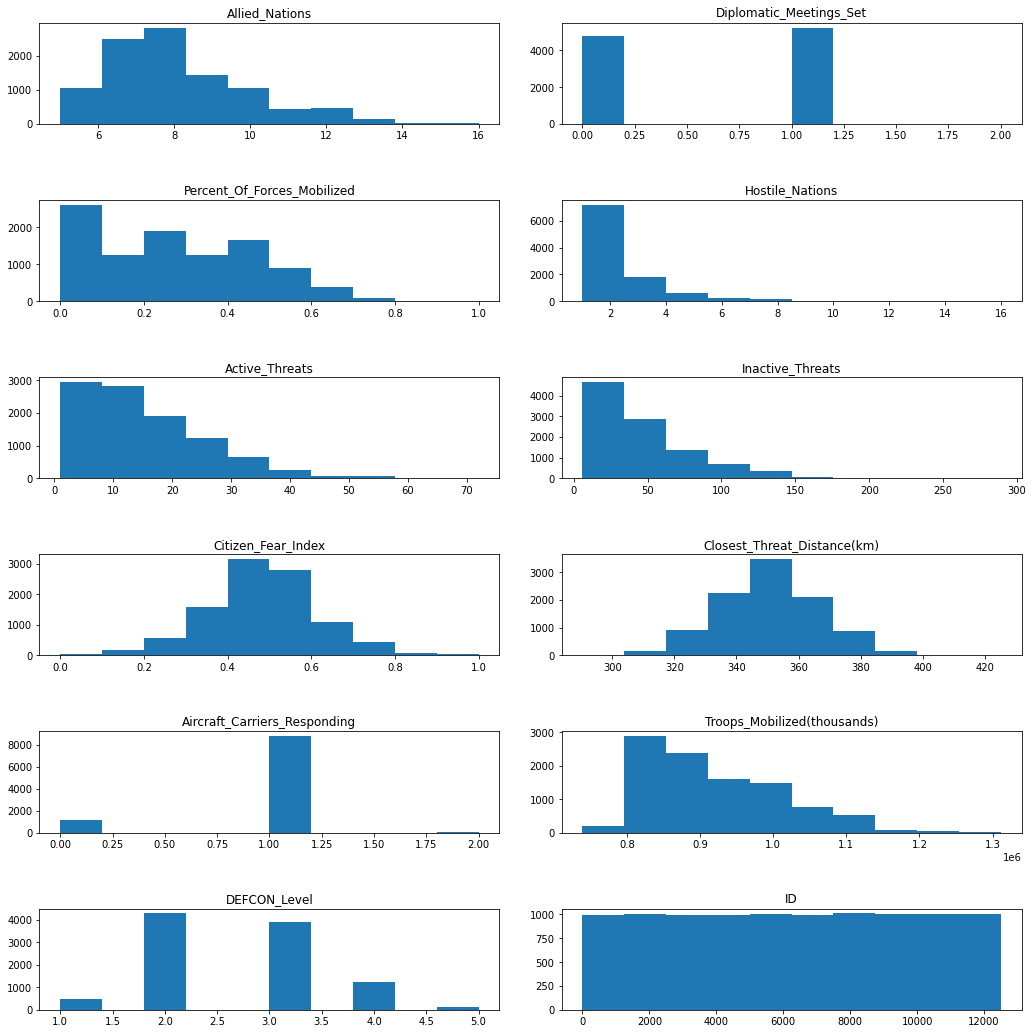

In [ ]:
ig, axis = plt.subplots(6, 2, figsize=(15,15)) 
for i, column in enumerate(dataset.columns):
  axis[i//2, i%2].hist(dataset[column])
  axis[i//2, i%2].set_title(column)
ig.tight_layout(pad=3.0)  
  #print(i//2, i%2, column)

__Observation:__
- Data in all the columns have different scales
- ID column is a record identifier 
- Target variable DEFCON Level has maximum data for values 2 and 3. Percentage of records for level 1, 4 and 5 are less and this indicates data imbalance
- Aircraft carriers responding indicates most of the recors have values betwen 1 and 1.25
- Citizen fear index and Closest threats seem to spread normal but also indicate some correlation between them.
- Allied Nations, Percentage of forces mobilized, Active threats, Inactive threats and Troops(Mobilized) have right scewed data 

- Checking Unique values in ID column

In [ ]:
dataset.ID.nunique()

10000

__Observation:__ ID column has unique values and we can drop it.

In [ ]:
dataset.drop(['ID'], axis=1, inplace=True)

- As our target column is multiple class let's see the overall data distribution for DEFCON level

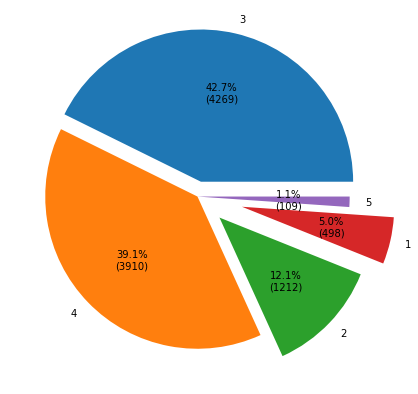

In [ ]:
#dataset['DEFCON_Level'].value_counts().plot(kind='pie')
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
ig = plt.figure(figsize =(10, 7))    
data = dataset['DEFCON_Level'].value_counts()
explode = (0.1, 0.0, 0.2, 0.3, 0.0)
plt.pie(data, labels=dataset['DEFCON_Level'].unique(), autopct = lambda pct: func(pct, data), explode=explode)
plt.show()

__Observation:__ We can see that we have just above 1% of records for DEFCON level5 and 5% records for DEFCON level1. We must use Data sampling techniques to make our data balanced. Alternatively, we will pass different class weights to models. 

- Draw heatmap on the dataset

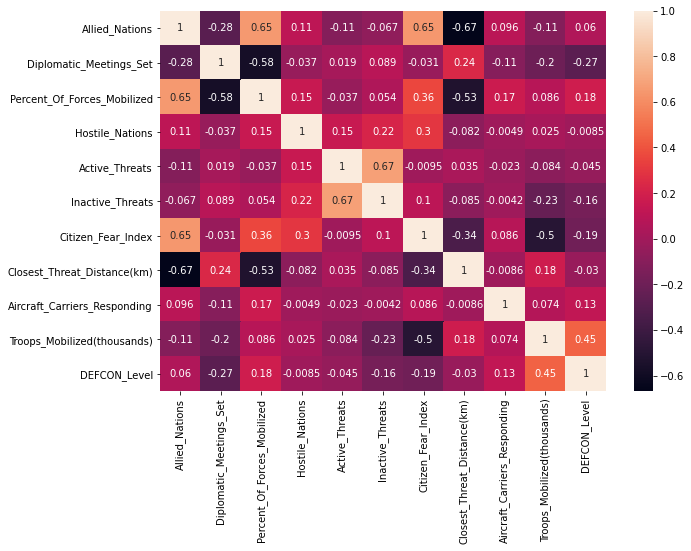

In [ ]:
# plotting the heatmap

fig= plt.figure(figsize=(10,7))
hm = sns.heatmap(data = dataset.corr(), annot=True)
  
# displaying the plotted heatmap
plt.show()

Observation: 
- Hostile Nations seem to have no impact on DEFCON Level
- Aircraft_Carrers_Responding has low corelation with amost all features
- Active_Threats and Inactive_Threats have strong correlation
- Percentage_of_forced_Mobilized has negative correlation with Dipomatic_Meetings_Set
- Citizen_Fear_Index and Allied_Nations have strong positive correlation

- Let's check feature importance so that we can decide which all features we will take forward for our modelling

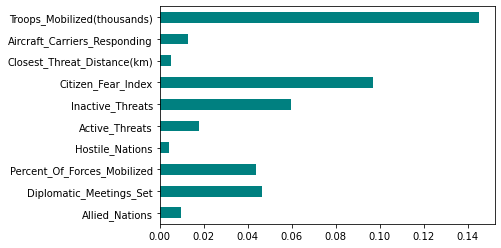

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(dataset.iloc[:, dataset.columns!='DEFCON_Level'],dataset['DEFCON_Level'])
feat_importance= pd.Series(importances, dataset.columns[0:len(dataset.columns)-1])
feat_importance.plot(kind='barh',color='teal')
plt.show()

__Observation:__ Most important feature is Troop_Mobilized(thousands) that too has 16% probability to influence the DEFCON level.

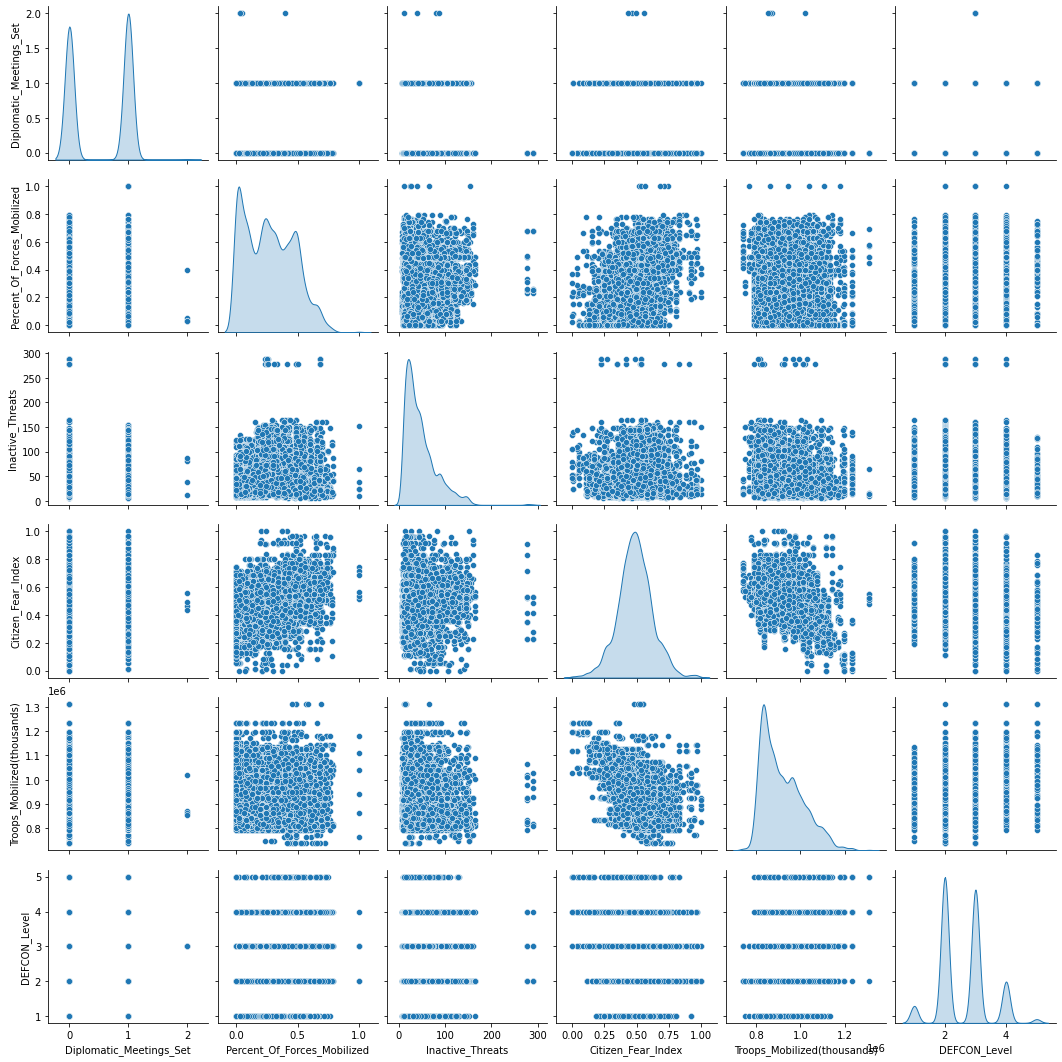

In [ ]:
sns.pairplot(dataset[['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)', 'DEFCON_Level']], diag_kind="kde")

- Troops_Mobilized and Citizen_fear_index show slight correlation other features don't show any correlations

<a id=section203></a>
### 2.3 Split the Data into Train, Val, Test
- Let's take only ['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)', 'DEFCON_Level'] features in our final dataset
- Now we will split the dataset into a training set , Validation set and a test set.
- As our dataset shows imbalane of classes, we will have to pass weights on our models

- We will use the test set in the final evaluation of our model.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
X = dataset[['Diplomatic_Meetings_Set', 'Percent_Of_Forces_Mobilized', 'Inactive_Threats', 'Citizen_Fear_Index', 'Troops_Mobilized(thousands)']]
y = dataset['DEFCON_Level']
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

1

In [ ]:
X.iloc

In [ ]:
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [9610 2401 2981 ... 6159  609 9110] TEST: [9964 4050 3768 ... 6223 2334 9428]


In [ ]:
sss.get_n_splits(X_train, y_train)

1

In [ ]:
for train_index, test_index in sss.split(X_train, y_train):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
  y_train, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

TRAIN: [6560 2732 5443 ... 2063 7770 5958] TEST: [7307 3169 2878 ... 1705 2414 4595]


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6400, 5), (6400,), (1600, 5), (1600,), (2000, 5), (2000,))

- let's check data distribution

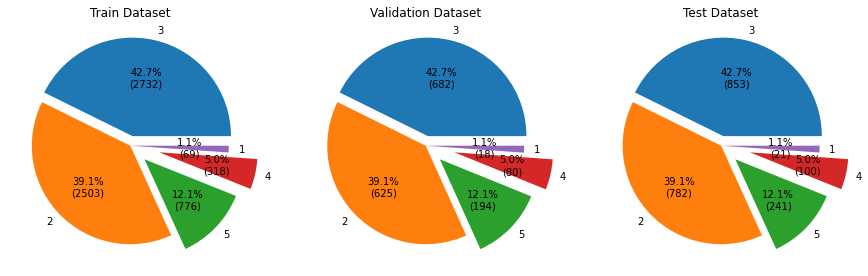

In [ ]:
ig, axis = plt.subplots(1, 3, figsize=(15,15)) 
#ig = plt.figure(figsize =(15, 10))   

explode = (0.1, 0.0, 0.2, 0.3, 0.0)

labels = pd.DataFrame(data=y_train, columns=['DEFCON_Level'])['DEFCON_Level'].unique()
data = pd.DataFrame(data=y_train, columns=['DEFCON_Level']).value_counts()
axis[0].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)

data = pd.DataFrame(data=y_val, columns=['DEFCON_Level']).value_counts()
axis[1].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)

data = pd.DataFrame(data=y_test, columns=['DEFCON_Level']).value_counts()
axis[2].pie(data, labels=labels, autopct = lambda pct: func(pct, data), explode=explode)
axis[0].title.set_text('Train Dataset')
axis[1].title.set_text('Validation Dataset')
axis[2].title.set_text('Test Dataset')
plt.show()

__Observation:__ Our dataset is distributed with proportionate count for each class

<a id=section204></a>
### 2.4 Basic EDA on the Train Data



Feature importance of features on test data

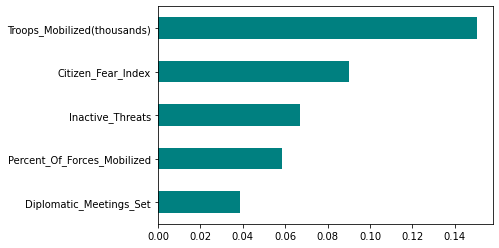

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X_train,y_train)
feat_importance= pd.Series(importances, X_train.columns[0:len(X_train.columns)])
feat_importance.plot(kind='barh',color='teal')
plt.show()

- Drawing heatmap to see the correlation among variables

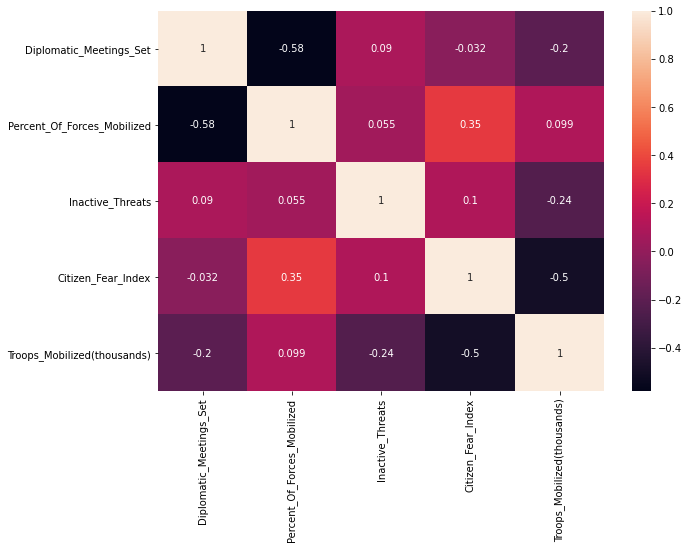

In [ ]:
# plotting the heatmap
fig= plt.figure(figsize=(10,7))
hm = sns.heatmap(data = X_train.corr(), annot=True)
 
# displaying the plotted heatmap
plt.show()

__Observations:__ None of the features look collinear

- We will have a quick look at the joint distribution of a few pairs of columns from the training set.

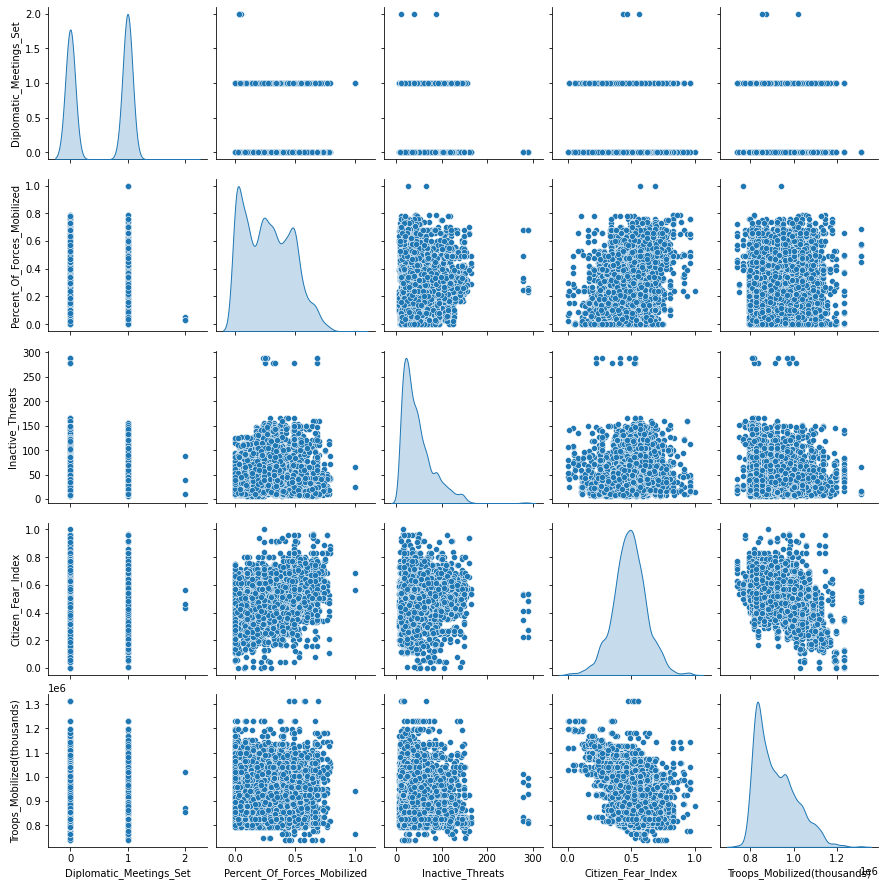

In [ ]:
sns.pairplot(X_train, diag_kind='kde')
plt.show()

__Observation:__ As seen in the heatmap as well. We don't have multicollinearity in our data

<a id=section205></a>
### 2.5 One-Hot encode Target Variable

As our problem is multiclassLabel we will encode the target variable and also perform one-hot encoding on them. 

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#Label encode train target variable
le.fit(y_train)
y_train = le.transform(y_train)

#Label encode val target variable
le.fit(y_val)
y_val = le.transform(y_val)

#Label encode test target variable
le.fit(y_test)
y_test = le.transform(y_test)

# as our target variable is multiclass we will convert to dummy variables (i.e. one hot encoded) for training data
y_train_dummy = np_utils.to_categorical(y_train, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_val_dummy = np_utils.to_categorical(y_val, num_classes=5)
# convert integers to dummy variables (i.e. one hot encoded) for training data
y_test_dummy = np_utils.to_categorical(y_test, num_classes=5)


In [ ]:
# checking shapes of train nd test target variables 
print(f"Features Shape: Train {X_train.shape}  Validation {X_val.shape} Test {X_test.shape}")
print(f"Target Shape: Train {y_train_dummy.shape} Validation {y_val_dummy.shape} Test {y_test_dummy.shape}")


Features Shape: Train (6400, 5)  Validation (1600, 5) Test (2000, 5)
Target Shape: Train (6400, 5) Validation (1600, 5) Test (2000, 5)


<a id=section206></a>
### 2.6 Normalize the Data

- Our dataset has features in multiple scales. We will normalize the data. Let's check some statistics of train dataset

In [ ]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Diplomatic_Meetings_Set,6400.0,0.528906,0.500141,0.0,0.000000,1.000000,1.000000,2.0
Percent_Of_Forces_Mobilized,6400.0,0.269822,0.195724,0.0,0.090000,0.260000,0.430000,1.0
Inactive_Threats,6400.0,46.660313,33.914757,6.0,21.000000,38.000000,62.000000,289.0
Citizen_Fear_Index,6400.0,0.485979,0.133113,0.0,0.406021,0.486784,0.567548,1.0
Troops_Mobilized(thousands),6400.0,917051.895833,92573.315491,739200.0,836000.000000,897600.000000,976800.000000,1311200.0


In [ ]:
train_stats['mean']

Diplomatic_Meetings_Set             0.528906
Percent_Of_Forces_Mobilized         0.269822
Inactive_Threats                   46.660313
Citizen_Fear_Index                  0.485979
Troops_Mobilized(thousands)    917051.895833
Name: mean, dtype: float64

__Observation:__ All features are in different scales. 


- Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

- **Note**: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the vaidation and test dataset.

  - We need to do that to project the validation and test dataset into the same distribution that the model has been trained on.

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [ ]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Diplomatic_Meetings_Set,6400.0,0.528906,0.500141,0.0,0.000000,1.000000,1.000000,2.0
Percent_Of_Forces_Mobilized,6400.0,0.269822,0.195724,0.0,0.090000,0.260000,0.430000,1.0
Inactive_Threats,6400.0,46.660313,33.914757,6.0,21.000000,38.000000,62.000000,289.0
Citizen_Fear_Index,6400.0,0.485979,0.133113,0.0,0.406021,0.486784,0.567548,1.0
Troops_Mobilized(thousands),6400.0,917051.895833,92573.315491,739200.0,836000.000000,897600.000000,976800.000000,1311200.0


In [ ]:
#Normalizing data for train, val and test
normed_X_train = norm(X_train)
normed_X_val = norm(X_val)
normed_X_test = norm(X_test)
print('Check the shape of normalized features datasets: ', normed_X_train.shape, normed_X_val.shape, normed_X_test.shape )

Check the shape of normalized features datasets:  (6400, 5) (1600, 5) (2000, 5)


- This normalized data is what we will use to train the model.

- The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.

  - That includes the test set as well as live data when the model is used in production.

In [ ]:
normed_X_train.describe()

,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Inactive_Threats,Citizen_Fear_Index,Troops_Mobilized(thousands)
count,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03,6.400000e+03
mean,8.708312e-17,1.311798e-14,-5.294376e-17,-1.017233e-15,-2.869874e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.057514e+00,-1.378580e+00,-1.198897e+00,-3.650876e+00,-1.921200e+00
25%,-1.057514e+00,-9.187500e-01,-7.566120e-01,-6.006812e-01,-8.755428e-01
50%,9.419219e-01,-5.018214e-02,-2.553553e-01,6.048335e-03,-2.101242e-01
75%,9.419219e-01,8.183857e-01,4.523013e-01,6.127779e-01,6.454139e-01
max,2.941358e+00,3.730642e+00,7.145553e+00,3.861539e+00,4.257686e+00


- Check for multicollinearity among features once again

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = normed_X_train.iloc[:,:]
display(calc_vif(X))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,variables,VIF
0,Diplomatic_Meetings_Set,1.617619
1,Percent_Of_Forces_Mobilized,1.955128
2,Inactive_Threats,1.089284
3,Citizen_Fear_Index,1.733989
4,Troops_Mobilized(thousands),1.588159


__Observation:__ None of the column has VIF value more than which indicates there are is no multicollinearity

#### Final Check on feature importance on normalized Data

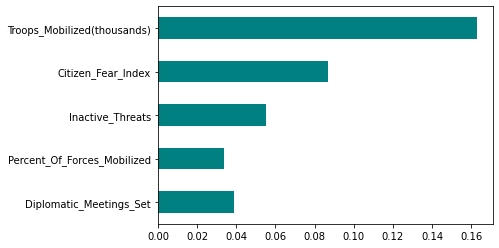

In [ ]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(normed_X_train,y_train)
feat_importance= pd.Series(importances, normed_X_train.columns[0:len(normed_X_train.columns)])
feat_importance.plot(kind='barh',color='teal')
plt.show()

<a id=section3></a>
## 3. The Models

<a id=section301></a>
### 3.1 Basic Model



#### 3.1.1 Model Definition

- Let's build our model.

11 inputs -> [8 hidden nodes] -> 5 outputs </br> Layer Activation: 'Relu'</br>
Output Layer Activation: “softmax” ; This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.</br>
Finally, the network uses the efficient 'Adam' gradient descent optimization algorithm with a logarithmic loss function, which is called “categorical_crossentropy” in Keras. We will be evaulating 'Accuracy' of the model as metric

- The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [ ]:
#Checking number of inputs features and output nodes
normed_X_train.shape[1], y_train_dummy.shape[1]

(5, 5)

- We have 5 outputs
- As we have imbalance data let's pass weights classes differently

In [ ]:
def class_weight(labels_dict,mu=0.15):
  total = np.sum(labels_dict.values())
  keys = labels_dict.keys()
  weight = dict()
  for i in keys:
    score = np.log(mu*6400/float(labels_dict[i]))
    weight[i] = score if score > 1 else 1
  return weight
# random labels_dict
labels_dict = pd.DataFrame(data=y_train, columns=['DEFCON_Level'])['DEFCON_Level'].value_counts().to_dict()
weights = class_weight(labels_dict)
weights
#print(labels_dict)
#total =np.sum(labels_dict.values())
#total

{0: 1.104881901681705, 1: 1, 2: 1, 3: 1, 4: 2.618438042412523}

- Define the model

In [ ]:
input_shape = (normed_X_train.shape[1],)
print('Input Shape:', input_shape)
output_shape = y_train_dummy.shape[1]
print('Output Shape: ', output_shape)

Input Shape: (5,)
Output Shape:  5


In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(8, activation='relu', input_shape=input_shape,  kernel_initializer='zeros'))
  model.add(Dense(output_shape, activation='softmax'))  

  # Defining the optimizer with a specific learning rate of 0.001
  optimizer = tf.keras.optimizers.Adam(0.001)
  # Compiling the model
  model.compile( optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

  return model
model = build_model()

<a id=section302></a>
#### 3.1.2 Inspect the Model

- Using the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


- Our mode has just two layers and parmeters for first hidden layers are 88 (10(feasures) * 8 (nodes)=80 + 8 biases). Similarly for second layer we have 45 paramters (8 (inputs from first layer)*5(nodes)=40 + 5 biases)
- Now let's try out the model.

- without training the model taking a batch of `10` examples from the training data and calling `model.predict` on it.

In [ ]:
example_batch = normed_X_train[:10]
example_result = model.predict(example_batch)
print('Shape of Predictions: ', example_result.shape)
example_result

Shape of Predictions:  (10, 5)


array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]], dtype=float32)

- It seems to be working, and it produces a result of the expected shape and type.

- We haven't trained the model yet, and as a result the above predictions are like this. 

<a id=section303></a>
#### 3.1.2 Train the Model

- Training the model for 200 epochs, and recording the training and validation accuracy in the `history` object.

- We are using `tfdocs.modeling.EpochDots()` callback to print a "." every epoch, with reports after each 100 epochs.

  - These print settings are the default values, i. e. printing a "." after each epoch and a report after 100 epochs.

  - We can change these as per our requirements in the callback.

In [ ]:
EPOCHS = 200

In [ ]:
history = model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.4103,  loss:1.5779,  val_accuracy:0.4269,  val_loss:1.4769,  
....................
Epoch: 20, accuracy:0.4270,  loss:1.2711,  val_accuracy:0.4269,  val_loss:1.1962,  
....................
Epoch: 40, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1936,  
....................
Epoch: 60, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 80, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 100, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 120, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 140, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 160, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
....................
Epoch: 180, accuracy:0.4270,  loss:1.2707,  val_acc

<a id=section303></a>
#### 3.1.3 Model Evaluation

- Visualizing the model's training progress using the stats stored in the `history` object.

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.270745,0.427031,1.193593,0.426875,195
196,1.270804,0.427031,1.193569,0.426875,196
197,1.270739,0.427031,1.193471,0.426875,197
198,1.270771,0.427031,1.193551,0.426875,198
199,1.270751,0.427031,1.193424,0.426875,199


- Plotting the **accuracy** plot for train and val set.
- Plotting the **loss** plot for train and val set.

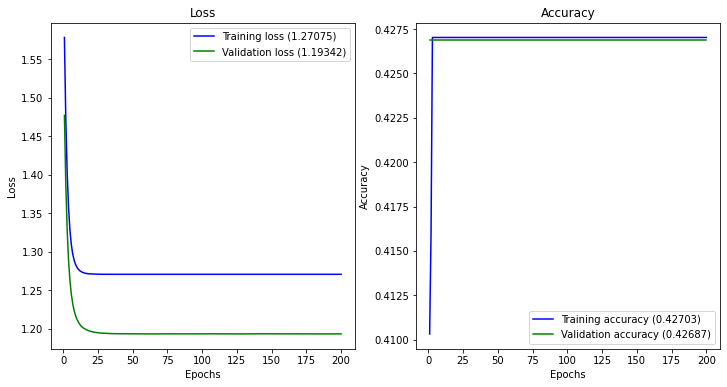

In [ ]:
plot_history(history)

- Looking at Accuracy graph we can see training and validation accuracy does not reach beyond 45%. It seems model is not learning enough to do predictions

- Also, it appears that model is not learning after certain epohs

- Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve.

- We'll use an *EarlyStopping callback* that tests a training condition for  every epoch.

  - If a set amount of epochs elapses without showing improvement, then automatically stop the training. Here we are adding a patience of 20 epochs

##### Full report on the Validation Set

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.426875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.42688   1.00000   0.59834       683
           2    0.00000   0.00000   0.00000       625
           3    0.00000   0.00000   0.00000       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.42687      1600
   macro avg    0.08538   0.20000   0.11967      1600
weighted avg    0.18222   0.42688   0.25541      1600

[[  0  80   0   0   0]
 [  0 683   0   0   0]
 [  0 625   0   0   0]
 [  0 194   0   0   0]
 [  0  18   0   0   0]]


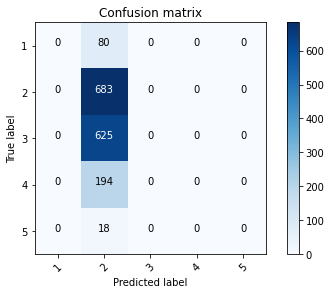

In [ ]:
full_multiclass_report(model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full report on Test Dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.427

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       100
           1    0.42700   1.00000   0.59846       854
           2    0.00000   0.00000   0.00000       782
           3    0.00000   0.00000   0.00000       242
           4    0.00000   0.00000   0.00000        22

    accuracy                        0.42700      2000
   macro avg    0.08540   0.20000   0.11969      2000
weighted avg    0.18233   0.42700   0.25554      2000

[[  0 100   0   0   0]
 [  0 854   0   0   0]
 [  0 782   0   0   0]
 [  0 242   0   0   0]
 [  0  22   0   0   0]]


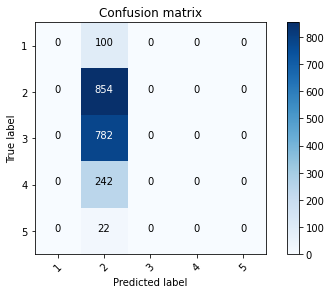

In [ ]:
full_multiclass_report(model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

<a id=section303></a>
#### 3.1.4 Train the Model with Early Stopping

In [ ]:
es_model = build_model()

In [ ]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
early_history = es_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=[early_stop, tfdocs.modeling.EpochDots( report_every=30)])




Epoch: 0, accuracy:0.4136,  loss:1.5785,  val_accuracy:0.3906,  val_loss:1.4775,  
..............................
Epoch: 30, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1941,  
..............................
Epoch: 60, accuracy:0.4270,  loss:1.2707,  val_accuracy:0.4269,  val_loss:1.1935,  
..............................
Epoch: 90, accuracy:0.4270,  loss:1.2708,  val_accuracy:0.4269,  val_loss:1.1935,  
............

<a id=section303></a>
#### 3.1.5 Evaulate EarlyStopping model 

In [ ]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch
early_hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
97,1.270762,0.427031,1.193542,0.426875,97
98,1.270708,0.427031,1.193499,0.426875,98
99,1.270733,0.427031,1.193457,0.426875,99
100,1.270751,0.427031,1.193460,0.426875,100
101,1.270772,0.427031,1.193465,0.426875,101


- The training stopped before completing the 75 epochs due to our EarlyStopping callback as model was not showing improvement



##### Plotting training history 

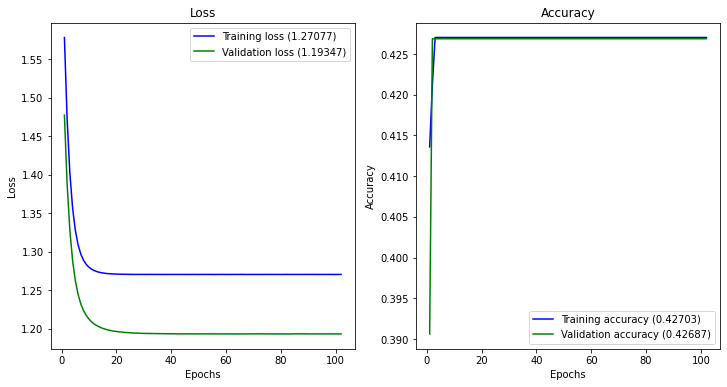

In [ ]:
plot_history(early_history)

##### Full Model performance report on Val dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.426875

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.42688   1.00000   0.59834       683
           2    0.00000   0.00000   0.00000       625
           3    0.00000   0.00000   0.00000       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.42687      1600
   macro avg    0.08538   0.20000   0.11967      1600
weighted avg    0.18222   0.42688   0.25541      1600

[[  0  80   0   0   0]
 [  0 683   0   0   0]
 [  0 625   0   0   0]
 [  0 194   0   0   0]
 [  0  18   0   0   0]]


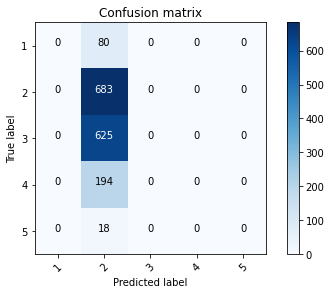

In [ ]:
full_multiclass_report(es_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

##### Full Model performance report on Test dataset

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy : 0.427

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000       100
           1    0.42700   1.00000   0.59846       854
           2    0.00000   0.00000   0.00000       782
           3    0.00000   0.00000   0.00000       242
           4    0.00000   0.00000   0.00000        22

    accuracy                        0.42700      2000
   macro avg    0.08540   0.20000   0.11969      2000
weighted avg    0.18233   0.42700   0.25554      2000

[[  0 100   0   0   0]
 [  0 854   0   0   0]
 [  0 782   0   0   0]
 [  0 242   0   0   0]
 [  0  22   0   0   0]]


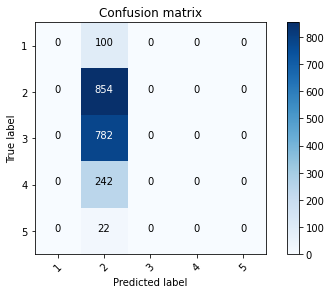

In [ ]:
full_multiclass_report(es_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

__Observation:__

- Confusion matrix for Validation as well as Test dataset show that model Predicts DEFCON level2 for all the records 

- So far not a good performance. We will try with other option to tune the models

<a id=section4></a>
### 3.2. Model Tuning

- We have not achieved good performance from our models as yet 

- Let's experiment some additional methods to **improve** the model **performance**



<a id=section401></a>
#### 3.2.1 Increasing the Number of Hidden Layers and Hidden Units

- Increasing number of layers and also inceasing number of nodes in each layer

- Define the Model

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(output_shape, activation='softmax'))  


  return model
multilayered_model = build_model()

- Inspect the Model

In [ ]:
multilayered_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 165       
Total params: 3,525
Trainable params: 3,525
Non-trainable params: 0
_________________________________________________________________


- Compile the Model

Lets try with a different optimizer this time

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
multilayered_model.compile( optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


- We are not using the Early Stopping callback now.

- The model will be trained for **20 epochs**.

In [ ]:
history_multilayered = multilayered_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5334,  loss:1.1777,  val_accuracy:0.5344,  val_loss:1.0552,  
....................
Epoch: 20, accuracy:0.5825,  loss:1.0097,  val_accuracy:0.5456,  val_loss:1.0106,  
....................
Epoch: 40, accuracy:0.5814,  loss:0.9854,  val_accuracy:0.5444,  val_loss:1.0170,  
....................
Epoch: 60, accuracy:0.5841,  loss:0.9722,  val_accuracy:0.5437,  val_loss:1.0358,  
....................
Epoch: 80, accuracy:0.5852,  loss:0.9618,  val_accuracy:0.5519,  val_loss:1.0260,  
....................
Epoch: 100, accuracy:0.5984,  loss:0.9529,  val_accuracy:0.5506,  val_loss:1.0537,  
....................
Epoch: 120, accuracy:0.5958,  loss:0.9520,  val_accuracy:0.5537,  val_loss:1.0999,  
....................
Epoch: 140, accuracy:0.5944,  loss:0.9431,  val_accuracy:0.5406,  val_loss:1.0917,  
....................
Epoch: 160, accuracy:0.6039,  loss:0.9397,  val_accuracy:0.5506,  val_loss:1.1148,  
....................
Epoch: 180, accuracy:0.6023,  loss:0.9362,  val_acc

In [ ]:
df_multilayered_model = pd.DataFrame(history_multilayered.history)
df_multilayered_model['epoch'] = history_multilayered.epoch
df_multilayered_model.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,0.931542,0.606719,1.142163,0.542500,195
196,0.932022,0.609688,1.163144,0.550625,196
197,0.930348,0.604219,1.173277,0.538125,197
198,0.939252,0.602031,1.130170,0.540000,198
199,0.933429,0.597500,1.119158,0.530625,199


- Plotting history of Model run of multirun model

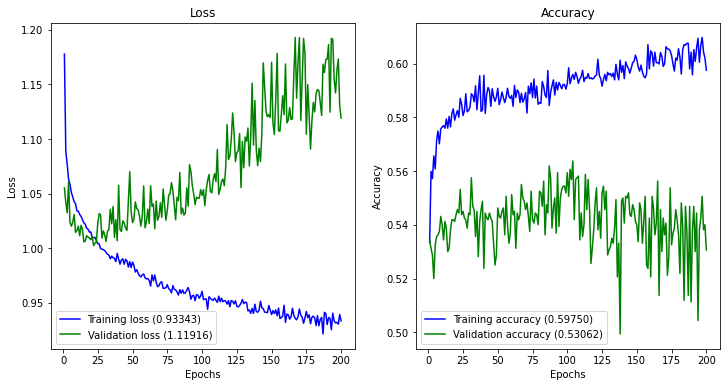

In [ ]:
plot_history(history_multilayered)

__Observation:__
- For first 20 EPOCHS training and validation loss fell alike and after that validation loss began to increase
- Training accuracy increased but validation accuracy stayed almost similar after 20 EPOCHS
- Accuracy Scores are still not very good

#####Full Report of Model performance on Validation Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.530625

Classification Report
              precision    recall  f1-score   support

           0    0.21429   0.11250   0.14754        80
           1    0.60892   0.69985   0.65123       683
           2    0.50546   0.51840   0.51185       625
           3    0.41860   0.18557   0.25714       194
           4    0.04348   0.11111   0.06250        18

    accuracy                        0.53063      1600
   macro avg    0.35815   0.32549   0.32605      1600
weighted avg    0.51934   0.53063   0.51719      1600

[[  9  53  15   3   0]
 [ 19 478 175   6   5]
 [ 11 234 324  38  18]
 [  3  19 115  36  21]
 [  0   1  12   3   2]]


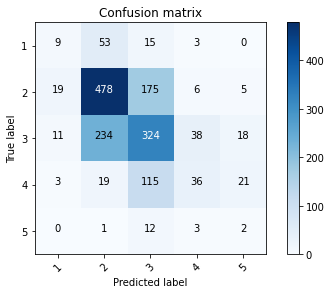

In [ ]:
full_multiclass_report(multilayered_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

#####Full Report of Model performance on Test Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5505

Classification Report
              precision    recall  f1-score   support

           0    0.23214   0.13000   0.16667       100
           1    0.62256   0.71077   0.66375       854
           2    0.52298   0.53836   0.53056       782
           3    0.53153   0.24380   0.33428       242
           4    0.01887   0.04545   0.02667        22

    accuracy                        0.55050      2000
   macro avg    0.38562   0.33368   0.34438      2000
weighted avg    0.54645   0.55050   0.53995      2000

[[ 13  62  23   2   0]
 [ 23 607 215   3   6]
 [ 16 280 421  38  27]
 [  4  22 138  59  19]
 [  0   4   8   9   1]]


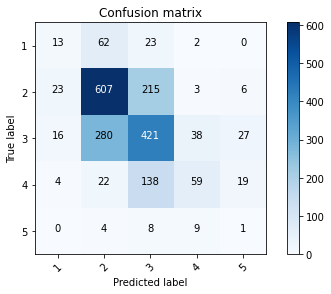

In [ ]:
full_multiclass_report(multilayered_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [ ]:
# evaluate the model
_, train_acc = multilayered_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = multilayered_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.618, Test: 0.550


- We get a slight increase in the test set results.

- It seems the deeper model is **overfitting** the train set.

- The performanceis still not up to the mark

- We will continue with other options to improve our model performance

<a id=section402></a>
#### 3.2.2 Weight Regularization

- Regularization places **constraints** on the quantity and type of information the model can store.

- If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

- We can put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".

- This is called "**weight regularization**", and it is done by adding to the loss function of the network a cost associated with having large weights.

- This cost comes in two flavors:

  - L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

  - L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights).
    - L2 regularization is also called weight decay in the context of neural networks.
    
    - Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

- L1 regularization pushes weights towards exactly zero encouraging a sparse model.

- L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights.

  - One reason why L2 is more common.

- In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

- Let's add L2 weight regularization to the model.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  
  

  return model
l2_model = build_model()

- `l2(0.001)` means that every coefficient in the weight matrix of the layer will add `(0.001 * weight_coefficient_value**2)` to the total loss of the network.

In [ ]:
l2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 165       
Total params: 3,525
Trainable params: 3,525
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(.005)
# Compiling the model
l2_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_l2 = l2_model.fit(normed_X_train, y_train_dummy, epochs=200, class_weight=weights, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5305,  loss:1.2148,  val_accuracy:0.5244,  val_loss:1.0871,  
....................
Epoch: 20, accuracy:0.5678,  loss:1.0736,  val_accuracy:0.5325,  val_loss:1.0505,  
....................
Epoch: 40, accuracy:0.5691,  loss:1.0600,  val_accuracy:0.5331,  val_loss:1.0494,  
....................
Epoch: 60, accuracy:0.5680,  loss:1.0519,  val_accuracy:0.5238,  val_loss:1.0594,  
....................
Epoch: 80, accuracy:0.5708,  loss:1.0511,  val_accuracy:0.5369,  val_loss:1.0563,  
....................
Epoch: 100, accuracy:0.5669,  loss:1.0429,  val_accuracy:0.5331,  val_loss:1.0576,  
....................
Epoch: 120, accuracy:0.5669,  loss:1.0412,  val_accuracy:0.5294,  val_loss:1.0388,  
....................
Epoch: 140, accuracy:0.5709,  loss:1.0396,  val_accuracy:0.5362,  val_loss:1.0367,  
....................
Epoch: 160, accuracy:0.5741,  loss:1.0382,  val_accuracy:0.5381,  val_loss:1.0490,  
....................
Epoch: 180, accuracy:0.5739,  loss:1.0367,  val_acc

In [ ]:
hist_l2 = pd.DataFrame(history_l2.history)
hist_l2['epoch'] = history_l2.epoch
hist_l2.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.038925,0.572187,1.035391,0.535625,195
196,1.038898,0.570000,1.050669,0.526875,196
197,1.035580,0.573906,1.053514,0.538125,197
198,1.034950,0.575000,1.061604,0.520000,198
199,1.032757,0.574063,1.035643,0.547500,199


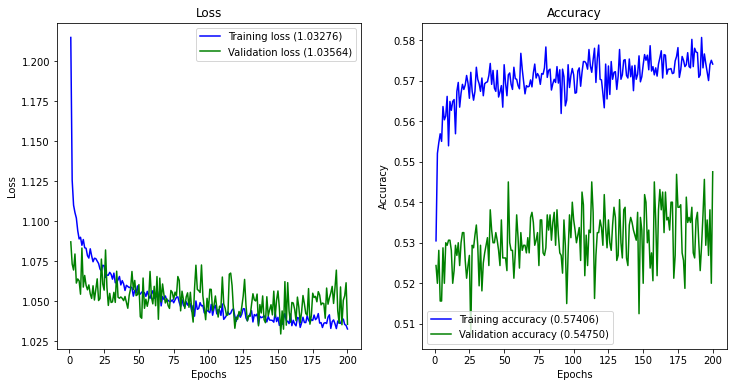

In [ ]:
plot_history(history_l2)

- With more training model tries to learn more on training data but couldn't do well on validation data
- With regularization model improved just slightly.

#####Full Report of Model performance on Validation Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5475

Classification Report
              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000        80
           1    0.59527   0.73646   0.65838       683
           2    0.49925   0.52960   0.51398       625
           3    0.52500   0.21649   0.30657       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.54750      1600
   macro avg    0.32390   0.29651   0.29578      1600
weighted avg    0.51278   0.54750   0.51899      1600

[[  0  63  17   0   0]
 [  4 503 173   3   0]
 [  0 261 331  30   3]
 [  0  16 131  42   5]
 [  0   2  11   5   0]]


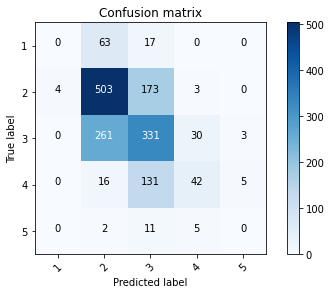

In [ ]:
full_multiclass_report(l2_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

#####Full Report of Model performance on Test Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5595

Classification Report
              precision    recall  f1-score   support

           0    0.50000   0.04000   0.07407       100
           1    0.60247   0.74356   0.66562       854
           2    0.51545   0.53325   0.52420       782
           3    0.50000   0.25207   0.33516       242
           4    0.28571   0.09091   0.13793        22

    accuracy                        0.55950      2000
   macro avg    0.48073   0.33196   0.34740      2000
weighted avg    0.54744   0.55950   0.53496      2000

[[  4  68  27   1   0]
 [  3 635 213   3   0]
 [  1 313 417  50   1]
 [  0  36 141  61   4]
 [  0   2  11   7   2]]


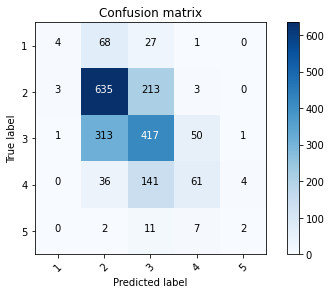

In [ ]:
full_multiclass_report(l2_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [ ]:
# evaluate the model
_, train_acc = l2_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.580, Test: 0.559


- After adding L2 regularization, the test set error is reduced.

- The performance on the test set is better than the larger model.

- The L2 regularized model is much more resistant to overfitting than the larger model.

<a id=section403></a>
#### 3.2.3 Dropout

- Dropout is one of the **most effective** and **most commonly used** regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

- The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

- Dropout, applied to a layer, consists of **randomly** "**dropping out**" (i.e. set to zero) a number of **output features** of the layer during training.

  - Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training.
  
  - After applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1].

- The "**dropout rate**" is the fraction of the features that are being zeroed-out; it is usually set between **0.2** and **0.5**.

- *At test time*, **no units are dropped out**, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

- In `tf.keras` we can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

- Let's add Dropout layers in our network to see how well they do at reducing overfitting.

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.02))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.02))
  model.add(Dense(64, activation='relu'))
  #model.add(Dropout(0.02))
  #model.add(Dense(256, activation='relu'))
  #model.add(Dropout(0.2))
  model.add(Dense(output_shape, activation='softmax'))    

  return model
dropout_model = build_model()

In [ ]:
dropout_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                192       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 325       
Total params: 6,789
Trainable params: 6,789
Non-trainable params: 0
____________________________________________________

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.01)
# Compiling the model
dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_dropout = dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=1000, validation_data=(normed_X_val, y_val_dummy), batch_size=500,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=100)])


Epoch: 0, accuracy:0.4717,  loss:1.2906,  val_accuracy:0.5131,  val_loss:1.0954,  
....................................................................................................
Epoch: 100, accuracy:0.6273,  loss:0.8665,  val_accuracy:0.5387,  val_loss:1.0883,  
....................................................................................................
Epoch: 200, accuracy:0.6589,  loss:0.7888,  val_accuracy:0.5263,  val_loss:1.2165,  
....................................................................................................
Epoch: 300, accuracy:0.6833,  loss:0.7344,  val_accuracy:0.5181,  val_loss:1.2738,  
....................................................................................................
Epoch: 400, accuracy:0.6858,  loss:0.7289,  val_accuracy:0.5019,  val_loss:1.3333,  
....................................................................................................
Epoch: 500, accuracy:0.7083,  loss:0.6938,  val_accuracy:0.5231,  val_l

In [ ]:
hist_dropout = pd.DataFrame(history_dropout.history)
hist_dropout['epoch'] = history_dropout.epoch
hist_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.643025,0.740156,1.518655,0.505000,995
996,0.652857,0.732969,1.499072,0.500625,996
997,0.649680,0.731875,1.510401,0.511875,997
998,0.649809,0.738750,1.537147,0.510625,998
999,0.648304,0.732813,1.534093,0.506250,999


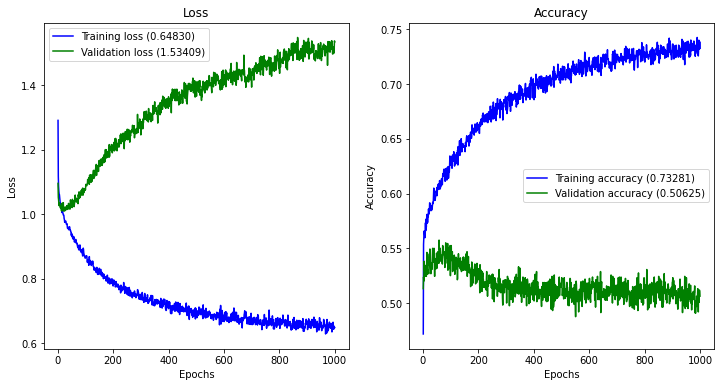

In [ ]:
plot_history(history_dropout)

#####Full Report of Model performance on Validation Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.50625

Classification Report
              precision    recall  f1-score   support

           0    0.20755   0.13750   0.16541        80
           1    0.58801   0.66032   0.62207       683
           2    0.48229   0.45760   0.46962       625
           3    0.35119   0.30412   0.32597       194
           4    0.15789   0.16667   0.16216        18

    accuracy                        0.50625      1600
   macro avg    0.35739   0.34524   0.34905      1600
weighted avg    0.49414   0.50625   0.49861      1600

[[ 11  50  18   1   0]
 [ 27 451 183  22   0]
 [ 14 240 286  78   7]
 [  1  25 100  59   9]
 [  0   1   6   8   3]]


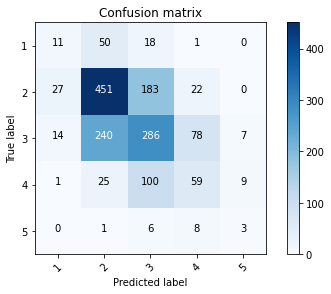

In [ ]:
full_multiclass_report(dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

#####Full Report of Model performance on Test Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.524

Classification Report
              precision    recall  f1-score   support

           0    0.17857   0.10000   0.12821       100
           1    0.61644   0.68501   0.64892       854
           2    0.49662   0.46931   0.48258       782
           3    0.37443   0.33884   0.35575       242
           4    0.10811   0.18182   0.13559        22

    accuracy                        0.52400      2000
   macro avg    0.35483   0.35500   0.35021      2000
weighted avg    0.51282   0.52400   0.51672      2000

[[ 10  50  40   0   0]
 [ 26 585 209  29   5]
 [ 18 285 367  98  14]
 [  2  27 117  82  14]
 [  0   2   6  10   4]]


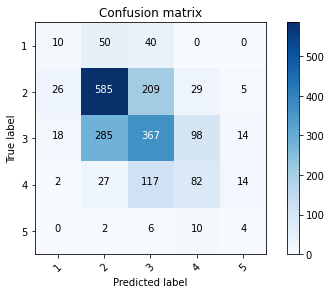

In [ ]:
full_multiclass_report(dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [ ]:
# evaluate the model
_, train_acc = dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.788, Test: 0.524


__Observation:__
- After adding the dropout the model is generalizing well on the test set.

- The performance is better than the larger model.

<a id=section404></a>
#### 3.2.4 Combined L2 + Dropout

- We can also combine both L2 regularization and Dropout in a single model.

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dropout(0.02))
  model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(output_shape, activation='softmax'))  

  return model
l2_dropout_model = build_model()

In [ ]:
l2_dropout_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               3072      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
l2_dropout_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_l2_dropout = l2_dropout_model.fit(normed_X_train, y_train_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), batch_size=300,
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])



Epoch: 0, accuracy:0.5184,  loss:2.3586,  val_accuracy:0.5025,  val_loss:1.9609,  
....................
Epoch: 20, accuracy:0.5725,  loss:1.0848,  val_accuracy:0.5269,  val_loss:1.0977,  
....................
Epoch: 40, accuracy:0.5744,  loss:1.0557,  val_accuracy:0.5362,  val_loss:1.0584,  
....................
Epoch: 60, accuracy:0.5778,  loss:1.0428,  val_accuracy:0.5344,  val_loss:1.0477,  
....................
Epoch: 80, accuracy:0.5761,  loss:1.0404,  val_accuracy:0.5331,  val_loss:1.0561,  
....................
Epoch: 100, accuracy:0.5819,  loss:1.0318,  val_accuracy:0.5469,  val_loss:1.0609,  
....................
Epoch: 120, accuracy:0.5808,  loss:1.0253,  val_accuracy:0.5444,  val_loss:1.0552,  
....................
Epoch: 140, accuracy:0.5905,  loss:1.0133,  val_accuracy:0.5506,  val_loss:1.0472,  
....................
Epoch: 160, accuracy:0.5909,  loss:1.0043,  val_accuracy:0.5263,  val_loss:1.0693,  
....................
Epoch: 180, accuracy:0.5895,  loss:1.0048,  val_acc

In [ ]:
hist_l2_dropout = pd.DataFrame(history_l2_dropout.history)
hist_l2_dropout['epoch'] = history_l2_dropout.epoch
hist_l2_dropout.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
195,1.000056,0.595625,1.065982,0.533750,195
196,0.997734,0.594219,1.047958,0.542500,196
197,0.999597,0.592344,1.066436,0.538750,197
198,0.997020,0.594063,1.072550,0.530625,198
199,1.002144,0.594063,1.053280,0.529375,199


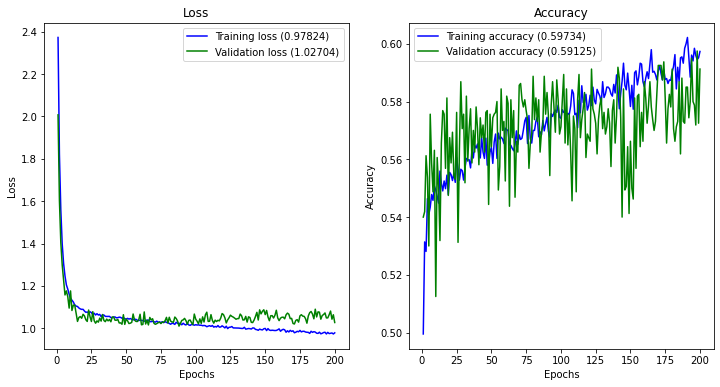

In [ ]:
plot_history(history_l2_dropout)

#####Full Report of Model performance on Validation Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.529375

Classification Report
              precision    recall  f1-score   support

           0    0.17647   0.03750   0.06186        80
           1    0.58732   0.77306   0.66751       683
           2    0.49116   0.40000   0.44092       625
           3    0.42038   0.34021   0.37607       194
           4    0.00000   0.00000   0.00000        18

    accuracy                        0.52938      1600
   macro avg    0.33507   0.31015   0.30927      1600
weighted avg    0.50237   0.52938   0.50587      1600

[[  3  61  14   2   0]
 [  8 528 138   9   0]
 [  5 288 250  73   9]
 [  1  20  98  66   9]
 [  0   2   9   7   0]]


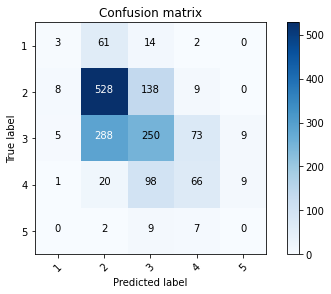

In [ ]:
full_multiclass_report(l2_dropout_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

#####Full Report of Model performance on Test Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5545

Classification Report
              precision    recall  f1-score   support

           0    0.31034   0.09000   0.13953       100
           1    0.59706   0.75995   0.66873       854
           2    0.53776   0.45524   0.49307       782
           3    0.45588   0.38430   0.41704       242
           4    0.11111   0.09091   0.10000        22

    accuracy                        0.55450      2000
   macro avg    0.40243   0.35608   0.36368      2000
weighted avg    0.53711   0.55450   0.53688      2000

[[  9  66  21   4   0]
 [ 10 649 180  13   2]
 [  8 326 356  84   8]
 [  2  43  98  93   6]
 [  0   3   7  10   2]]


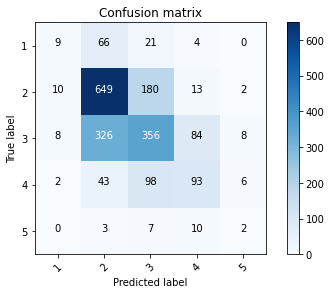

In [ ]:
full_multiclass_report(l2_dropout_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [ ]:
# evaluate the model
_, train_acc = l2_dropout_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = l2_dropout_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.596, Test: 0.554


- The combined L2 + Dropout model is also outperforming the larger model.

- We can attain a better score if we apply the Early Stopping callback to this model.

<a id=section405></a>
#### 3.2.5 Batch Normalization

- Batch normalization applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

- This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

- Since we are using **ReLU** activation function in our model, we will use the Batch Normalization layer **prior** to the ReLU layer.

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(256, input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(ReLU())
  model.add(Dense(output_shape, activation='softmax'))    

  return model
bnorm_model = build_model()

In [ ]:
bnorm_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               1536      
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
re_lu (ReLU)                 (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)              

In [ ]:
# Defining the optimizer with a specific learning rate of 0.001
optimizer = tf.keras.optimizers.RMSprop(0.001)
# Compiling the model
bnorm_model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_batch_norm = bnorm_model.fit(normed_X_train, y_train_dummy, batch_size=300, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=80), tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5111,  loss:1.2492,  val_accuracy:0.5088,  val_loss:1.4313,  
....................
Epoch: 20, accuracy:0.6077,  loss:0.9096,  val_accuracy:0.5462,  val_loss:1.0493,  
....................
Epoch: 40, accuracy:0.6272,  loss:0.8486,  val_accuracy:0.5281,  val_loss:1.0919,  
....................
Epoch: 60, accuracy:0.6420,  loss:0.8109,  val_accuracy:0.5312,  val_loss:1.1420,  
....................
Epoch: 80, accuracy:0.6722,  loss:0.7518,  val_accuracy:0.5356,  val_loss:1.2110,  
....................

In [ ]:
hist_batch_norm = pd.DataFrame(history_batch_norm.history)
hist_batch_norm['epoch'] = history_batch_norm.epoch
hist_batch_norm.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.717705,0.682344,1.239808,0.532500,95
96,0.718074,0.684844,1.262922,0.517500,96
97,0.730097,0.679844,1.215691,0.537500,97
98,0.732166,0.672188,1.250200,0.518125,98
99,0.722474,0.679062,1.206000,0.525000,99


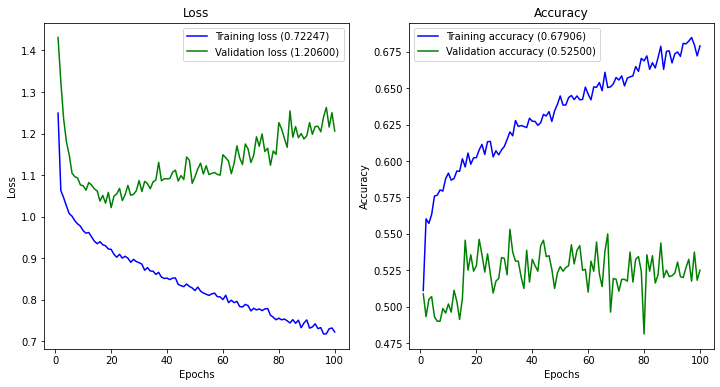

In [ ]:
plot_history(history_batch_norm)

#####Full Report of Model performance on Validation Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.525

Classification Report
              precision    recall  f1-score   support

           0    0.25641   0.12500   0.16807        80
           1    0.61657   0.64275   0.62939       683
           2    0.48471   0.50720   0.49570       625
           3    0.39891   0.37629   0.38727       194
           4    0.08333   0.05556   0.06667        18

    accuracy                        0.52500      1600
   macro avg    0.36799   0.34136   0.34942      1600
weighted avg    0.51466   0.52500   0.51841      1600

[[ 10  44  23   3   0]
 [ 20 439 207  17   0]
 [  8 212 317  83   5]
 [  1  16  98  73   6]
 [  0   1   9   7   1]]


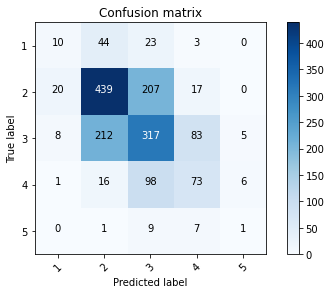

In [ ]:
full_multiclass_report(bnorm_model,
                       normed_X_val,
                       y_val_dummy,
                       le.inverse_transform(np.arange(5)))

#####Full Report of Model performance on Test Data

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy : 0.5485

Classification Report
              precision    recall  f1-score   support

           0    0.20408   0.10000   0.13423       100
           1    0.63739   0.66276   0.64983       854
           2    0.52020   0.52685   0.52351       782
           3    0.41699   0.44628   0.43114       242
           4    0.08333   0.04545   0.05882        22

    accuracy                        0.54850      2000
   macro avg    0.37240   0.35627   0.35950      2000
weighted avg    0.53714   0.54850   0.54169      2000

[[ 10  49  36   5   0]
 [ 18 566 236  32   2]
 [ 17 246 412 101   6]
 [  4  24 103 108   3]
 [  0   3   5  13   1]]


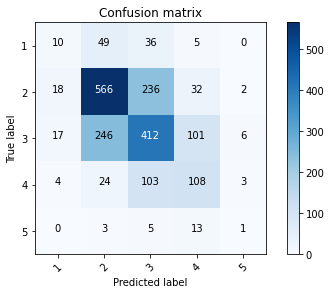

In [ ]:
full_multiclass_report(bnorm_model,
                       normed_X_test,
                       y_test_dummy,
                       le.inverse_transform(np.arange(5)))

In [ ]:
# evaluate the model
_, train_acc = bnorm_model.evaluate(normed_X_train, y_train_dummy, verbose=0)
_, test_acc = bnorm_model.evaluate(normed_X_test, y_test_dummy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.709, Test: 0.549


__Observation:__
- The Batch Normalization model attains the **lowest train set error**.

- We have seen significant **overfitting** here.

- It is not generalizing well on the test set.

- We can also incorporate the Early Stopping callback to this model to stop training at an appropriate epoch.

<a id=section5></a>
### 3.3. Hyperparamter Tuning

#### 3.3.1 Grid Search

In [ ]:
dense_layers = [[6],[16],[32]]
for index, lsize in enumerate(dense_layers):
  print(index, lsize)

0 [6]
1 [16]
2 [32]


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
  model = Sequential()

  for index, lsize in enumerate(dense_layers):
    # Input Layer - includes the input_shape
    if index == 0:
      model.add(Dense(lsize, activation=activation, input_shape=input_shape))
    else:
      model.add(Dense(lsize, activation=activation))
            
  model.add(Dense(output_shape,activation='softmax'))
  model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model,
                        epochs=10, 
                        batch_size=5,
                        verbose=0)

param_grid = {'dense_layers': [[6],[16],[32]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[10,50],
              'batch_size':[50,300]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')



In [ ]:
grid_results = grid.fit(normed_X_train,y_train)
print('Parameters of the best model: ')
print(grid_results.best_params_)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will b

KeyboardInterrupt: ignored

#### 3.3.1 Define and initiate HyperModel Class

In [ ]:
class MultiClassHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        #Input Layer
        model.add(
            layers.Dense(
                units=hp.Int('input_units', 32, 256, 32, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=input_shape, 
                kernel_initializer='glorot_uniform'
                #, bias_initializer='zeros'
            )
        )
        for i in range(hp.Int('num_layers', 1, 3)):
          model.add(layers.Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)                    
            )   
          )
          model.add(
            layers.Dense(
                units=hp.Int(f'hid_{i}_units', min_value= 32, max_value=512, step=32, default=32),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu'],
                    default='relu'),
                kernel_initializer='glorot_uniform'
                #, bias_initializer='zeros'
            )
          )
        

        #Output layer
        model.add(Dense(output_shape, activation='softmax'))
        #hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
        optimizer = hp.Choice('optimizer', ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'])
        #keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
        model.compile( optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
        
        return model

In [ ]:
hypermodel = MultiClassHyperModel(input_shape)

###Build, Run and Evaluate Random Search Tuner

In [ ]:
import time
LOG_DIR = f"{int(time.time())}"
tensorboard = TensorBoard(log_dir=LOG_DIR)
tuner_rs = RandomSearch(
            hypermodel,
            objective= 'val_accuracy',
            seed=42,
            max_trials=5,
            executions_per_trial=3, overwrite=True,
            directory=LOG_DIR 
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), 
callbacks = [tensorboard, tfdocs.modeling.EpochDots( report_every=20)]
tuner_rs.search(normed_X_train, y_train_dummy, epochs=20, batch_size = 64, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)





Epoch: 0, accuracy:0.3756,  loss:1.5644,  val_accuracy:0.5119,  val_loss:1.5058,  

Epoch: 0, accuracy:0.3100,  loss:1.5957,  val_accuracy:0.4487,  val_loss:1.5362,  

Epoch: 0, accuracy:0.3183,  loss:1.5348,  val_accuracy:0.4487,  val_loss:1.4089,  

Epoch: 0, accuracy:0.5323,  loss:1.0679,  val_accuracy:0.5819,  val_loss:0.9984,  

Epoch: 0, accuracy:0.5300,  loss:1.0626,  val_accuracy:0.5600,  val_loss:0.9992,  

Epoch: 0, accuracy:0.5275,  loss:1.0689,  val_accuracy:0.5569,  val_loss:1.0099,  

Epoch: 0, accuracy:0.3191,  loss:1.6006,  val_accuracy:0.4187,  val_loss:1.3852,  

Epoch: 0, accuracy:0.4247,  loss:1.4284,  val_accuracy:0.4187,  val_loss:1.3112,  

Epoch: 0, accuracy:0.3923,  loss:1.4580,  val_accuracy:0.3837,  val_loss:1.3224,  

Epoch: 0, accuracy:0.5069,  loss:1.3150,  val_accuracy:0.5400,  val_loss:1.1359,  

Epoch: 0, accuracy:0.4980,  loss:1.3166,  val_accuracy:0.5337,  val_loss:1.1396,  

Epoch: 0, accuracy:0.4916,  loss:1.3363,  val_accuracy:0.5431,  val_loss:1.

In [ ]:
tuner_rs.search_space_summary()

In [ ]:
tuner_rs.results_summary()

Results summary
Results in 1621775828/untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
input_units: 160
dense_activation: relu
num_layers: 2
dropout: 0.02
hid_0_units: 512
optimizer: Adam
hid_1_units: 480
Score: 0.5979166626930237
Trial summary
Hyperparameters:
input_units: 192
dense_activation: relu
num_layers: 2
dropout: 0.01
hid_0_units: 160
optimizer: Nadam
hid_1_units: 256
Score: 0.5962500174840292
Trial summary
Hyperparameters:
input_units: 224
dense_activation: tanh
num_layers: 2
dropout: 0.04
hid_0_units: 64
optimizer: SGD
hid_1_units: 384
Score: 0.5741666555404663
Trial summary
Hyperparameters:
input_units: 160
dense_activation: relu
num_layers: 2
dropout: 0.03
hid_0_units: 448
optimizer: Adagrad
hid_1_units: 32
Score: 0.5537500182787577
Trial summary
Hyperparameters:
input_units: 64
dense_activation: sigmoid
num_layers: 1
dropout: 0.06
hid_0_units: 128
optimizer: Adagrad
hid_1_units: 256
Score: 0.4414583345

In [ ]:
tuner_rs.get_best_hyperparameters()[0].values

{'dense_activation': 'relu',
 'dropout': 0.02,
 'hid_0_units': 512,
 'hid_1_units': 480,
 'input_units': 160,
 'num_layers': 2,
 'optimizer': 'Adam'}

In [ ]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('input_units')} and the optimal learning rate for the optimizer
is {best_hps.get('hid_0_units')}.
""")

63/63 [==============================] - 0s 2ms/step - loss: 0.9580 - accuracy: 0.5749
Random search Val Accuracy:  [0.9783142805099487, 0.5684999823570251]

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 512.



In [ ]:
predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

###Build, Run and Evaluate Hyperband Tuner

In [ ]:
tuner_hb = Hyperband(
            hypermodel,
            max_epochs=5,
            objective='val_accuracy',
            seed=42,
            executions_per_trial=2,
            directory='hb'
        )
callbacks = [tensorboard, tfdocs.modeling.EpochDots( report_every=20)]
tuner_hb.search(normed_X_train, y_train_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), batch_size=500, verbose=0, callbacks=callbacks)



In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

In [ ]:
predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

###Build, Run and Evaluate Bayesian Optimization Tuner

In [ ]:
tuner_bo = BayesianOptimization(
            hypermodel,
            objective='val_accuracy',
            max_trials=10,
            seed=42,
            executions_per_trial=2,
            directory='bo'
        )

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), tfdocs.modeling.EpochDots( report_every=20)]
tuner_bo.search(normed_X_train, y_train_dummy, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)



In [ ]:
best_model = tuner_hb.get_best_models(num_models=1)[0]
val_rs = best_model.evaluate(normed_X_test, y_test_dummy)[1]
print('Random search Val Accuracy: ', val_rs)
# Get the optimal hyperparameters
best_hps=tuner_rs.get_best_hyperparameters(num_trials=1)[0]
#best_hps
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

predictions = best_model.predict(normed_X_test[:3])
print("predictions shape:", predictions.shape)
print(predictions)
normed_X_test[:3]

Let's Try SMOTE and see the impact on models performances

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
X_resampled, y_resampled = SMOTE().fit_resample(normed_X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[(0, 2749), (1, 2749), (2, 2749), (3, 2749), (4, 2749)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
y_resampled_dummy = np_utils.to_categorical(y_resampled, num_classes=5)

In [ ]:
X_resampled.shape, y_resampled_dummy.shape

((13745, 6), (13745, 5))

In [ ]:
history = model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.3508,  loss:1.6392,  val_accuracy:0.2344,  val_loss:1.5310,  
....................
Epoch: 20, accuracy:0.5058,  loss:1.2882,  val_accuracy:0.3944,  val_loss:1.4977,  
....................
Epoch: 40, accuracy:0.5075,  loss:1.2885,  val_accuracy:0.4275,  val_loss:1.4863,  
....................
Epoch: 60, accuracy:0.5067,  loss:1.2949,  val_accuracy:0.3787,  val_loss:1.5180,  
....................
Epoch: 80, accuracy:0.5037,  loss:1.3005,  val_accuracy:0.4325,  val_loss:1.4900,  
....................
Epoch: 100, accuracy:0.5009,  loss:1.3037,  val_accuracy:0.4100,  val_loss:1.5575,  
....................
Epoch: 120, accuracy:0.5035,  loss:1.3070,  val_accuracy:0.4487,  val_loss:1.4522,  
....................
Epoch: 140, accuracy:0.5000,  loss:1.3143,  val_accuracy:0.4212,  val_loss:1.4659,  
....................
Epoch: 160, accuracy:0.4997,  loss:1.3127,  val_accuracy:0.3925,  val_loss:1.5452,  
....................
Epoch: 180, accuracy:0.5032,  loss:1.3202,  val_acc

In [ ]:
history_multilayered_model = multilayered_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.6286,  loss:0.9765,  val_accuracy:0.3906,  val_loss:1.5021,  
....................
Epoch: 20, accuracy:0.6833,  loss:0.7950,  val_accuracy:0.4506,  val_loss:1.3646,  
....................
Epoch: 40, accuracy:0.7018,  loss:0.7453,  val_accuracy:0.4387,  val_loss:1.5339,  
....................
Epoch: 60, accuracy:0.7205,  loss:0.7146,  val_accuracy:0.4787,  val_loss:1.5849,  
....................
Epoch: 80, accuracy:0.7250,  loss:0.6972,  val_accuracy:0.4094,  val_loss:1.8440,  
....................
Epoch: 100, accuracy:0.7331,  loss:0.6704,  val_accuracy:0.4631,  val_loss:1.9079,  
....................
Epoch: 120, accuracy:0.7387,  loss:0.6613,  val_accuracy:0.4769,  val_loss:1.9286,  
....................
Epoch: 140, accuracy:0.7425,  loss:0.6460,  val_accuracy:0.4831,  val_loss:2.0482,  
....................
Epoch: 160, accuracy:0.7481,  loss:0.6369,  val_accuracy:0.5125,  val_loss:1.9408,  
....................
Epoch: 180, accuracy:0.7523,  loss:0.6358,  val_acc

In [ ]:
history_l2_model = l2_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5389,  loss:1.2194,  val_accuracy:0.3806,  val_loss:1.4250,  
....................
Epoch: 20, accuracy:0.5960,  loss:1.0774,  val_accuracy:0.3988,  val_loss:1.4249,  
....................
Epoch: 40, accuracy:0.6061,  loss:1.0665,  val_accuracy:0.3975,  val_loss:1.4194,  
....................
Epoch: 60, accuracy:0.6039,  loss:1.0585,  val_accuracy:0.3931,  val_loss:1.4270,  
....................
Epoch: 80, accuracy:0.6097,  loss:1.0531,  val_accuracy:0.4238,  val_loss:1.3667,  
....................
Epoch: 100, accuracy:0.6147,  loss:1.0483,  val_accuracy:0.3887,  val_loss:1.4473,  
....................
Epoch: 120, accuracy:0.6140,  loss:1.0506,  val_accuracy:0.3938,  val_loss:1.4542,  
....................
Epoch: 140, accuracy:0.6170,  loss:1.0504,  val_accuracy:0.3825,  val_loss:1.5010,  
....................
Epoch: 160, accuracy:0.6173,  loss:1.0472,  val_accuracy:0.4200,  val_loss:1.4369,  
....................
Epoch: 180, accuracy:0.6138,  loss:1.0617,  val_acc

In [ ]:
history_dropout_model = dropout_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5075,  loss:1.3502,  val_accuracy:0.3738,  val_loss:1.3913,  
....................
Epoch: 20, accuracy:0.6386,  loss:0.9255,  val_accuracy:0.4350,  val_loss:1.3509,  
....................
Epoch: 40, accuracy:0.6681,  loss:0.8497,  val_accuracy:0.4119,  val_loss:1.3493,  
....................
Epoch: 60, accuracy:0.6785,  loss:0.8237,  val_accuracy:0.4231,  val_loss:1.4049,  
....................
Epoch: 80, accuracy:0.6832,  loss:0.8247,  val_accuracy:0.4231,  val_loss:1.4089,  
....................
Epoch: 100, accuracy:0.6907,  loss:0.8094,  val_accuracy:0.4663,  val_loss:1.3886,  
....................
Epoch: 120, accuracy:0.6845,  loss:0.8132,  val_accuracy:0.4437,  val_loss:1.4002,  
....................
Epoch: 140, accuracy:0.6956,  loss:0.7985,  val_accuracy:0.4781,  val_loss:1.3830,  
....................
Epoch: 160, accuracy:0.6923,  loss:0.7898,  val_accuracy:0.4394,  val_loss:1.4755,  
....................
Epoch: 180, accuracy:0.7062,  loss:0.7525,  val_acc

In [ ]:
history_l2_dropout_model = l2_dropout_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5964,  loss:1.1255,  val_accuracy:0.4563,  val_loss:1.5313,  
....................
Epoch: 20, accuracy:0.6736,  loss:0.9547,  val_accuracy:0.4663,  val_loss:1.3863,  
....................
Epoch: 40, accuracy:0.6907,  loss:0.9209,  val_accuracy:0.4669,  val_loss:1.4365,  
....................
Epoch: 60, accuracy:0.7054,  loss:0.8912,  val_accuracy:0.4531,  val_loss:1.4701,  
....................
Epoch: 80, accuracy:0.7155,  loss:0.8747,  val_accuracy:0.4231,  val_loss:1.5740,  
....................
Epoch: 100, accuracy:0.7204,  loss:0.8640,  val_accuracy:0.4669,  val_loss:1.5546,  
....................
Epoch: 120, accuracy:0.7272,  loss:0.8516,  val_accuracy:0.4800,  val_loss:1.5090,  
....................
Epoch: 140, accuracy:0.7290,  loss:0.8465,  val_accuracy:0.4638,  val_loss:1.5769,  
....................
Epoch: 160, accuracy:0.7330,  loss:0.8458,  val_accuracy:0.4700,  val_loss:1.5988,  
....................
Epoch: 180, accuracy:0.7379,  loss:0.8365,  val_acc

In [ ]:
history_bnorm = bnorm_model.fit(X_resampled, y_resampled_dummy, class_weight=weights, epochs=EPOCHS, validation_data=(normed_X_val, y_val_dummy),
                    verbose=0, callbacks=[tfdocs.modeling.EpochDots( report_every=20)])


Epoch: 0, accuracy:0.5689,  loss:1.2213,  val_accuracy:0.4519,  val_loss:1.3979,  
....................
Epoch: 20, accuracy:0.6589,  loss:0.8864,  val_accuracy:0.4469,  val_loss:1.3886,  
....................
Epoch: 40, accuracy:0.6834,  loss:0.8154,  val_accuracy:0.4762,  val_loss:1.3971,  
....................
Epoch: 60, accuracy:0.6899,  loss:0.7950,  val_accuracy:0.4544,  val_loss:1.3890,  
....................
Epoch: 80, accuracy:0.7078,  loss:0.7643,  val_accuracy:0.4631,  val_loss:1.4607,  
....................
Epoch: 100, accuracy:0.7174,  loss:0.7379,  val_accuracy:0.4775,  val_loss:1.4818,  
....................
Epoch: 120, accuracy:0.7201,  loss:0.7415,  val_accuracy:0.4712,  val_loss:1.4935,  
....................
Epoch: 140, accuracy:0.7284,  loss:0.7139,  val_accuracy:0.4712,  val_loss:1.4853,  
....................
Epoch: 160, accuracy:0.7283,  loss:0.7123,  val_accuracy:0.4831,  val_loss:1.4990,  
....................
Epoch: 180, accuracy:0.7409,  loss:0.6869,  val_acc

In [ ]:
import time
LOG_DIR = f"{int(time.time())}"
tensorboard = TensorBoard(log_dir=LOG_DIR)
tuner_rs = RandomSearch(
            hypermodel,
            objective= 'val_accuracy',
            seed=42,
            max_trials=5,
            executions_per_trial=3, overwrite=True,
            directory=LOG_DIR 
        )
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=20), 
callbacks = [tensorboard, tfdocs.modeling.EpochDots( report_every=20)]
tuner_rs.search(X_resampled, y_resampled_dummy, epochs=20, batch_size = 64, validation_data=(normed_X_val, y_val_dummy), verbose=0, callbacks=callbacks)





Epoch: 0, accuracy:0.2632,  loss:1.5498,  val_accuracy:0.0862,  val_loss:1.6481,  

Epoch: 0, accuracy:0.2646,  loss:1.5811,  val_accuracy:0.3656,  val_loss:1.5526,  

Epoch: 0, accuracy:0.2791,  loss:1.5777,  val_accuracy:0.3744,  val_loss:1.5403,  

Epoch: 0, accuracy:0.4912,  loss:1.1490,  val_accuracy:0.4206,  val_loss:1.2780,  

Epoch: 0, accuracy:0.5009,  loss:1.1436,  val_accuracy:0.3806,  val_loss:1.2697,  

Epoch: 0, accuracy:0.4926,  loss:1.1475,  val_accuracy:0.3681,  val_loss:1.3262,  

Epoch: 0, accuracy:0.1993,  loss:1.6596,  val_accuracy:0.1319,  val_loss:1.6492,  

Epoch: 0, accuracy:0.2445,  loss:1.6610,  val_accuracy:0.0881,  val_loss:1.6502,  

Epoch: 0, accuracy:0.2065,  loss:1.6393,  val_accuracy:0.1394,  val_loss:1.6042,  

Epoch: 0, accuracy:0.3969,  loss:1.3638,  val_accuracy:0.3438,  val_loss:1.4096,  

Epoch: 0, accuracy:0.4035,  loss:1.3716,  val_accuracy:0.3419,  val_loss:1.4108,  

Epoch: 0, accuracy:0.3996,  loss:1.3845,  val_accuracy:0.3319,  val_loss:1.

<a id=section6></a>
## 6. Conclusion

We studied a few techniques to handle a regression problem.

- **Mean Squared Error** (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

- Similarly, evaluation metrics used for regression differ from classification.

  - A common regression metric is **Mean Absolute Error** (MAE).

- When numeric input data features have values with different ranges, each **feature** should be **scaled** independently to the same range.

- If there is not much training data, one technique is to prefer a **small network** with few hidden layers to avoid overfitting.

- **Early stopping** is a useful technique to prevent overfitting.

- We can improve the performance of a model by increasing the number of hidden layers and the hidden units in the model.

- Regularization Techniques to reduce overfitting are:

  - **Weight Regularization**

  - **Dropout**

  - **Batch Normalization**